# **GAUSSIAN NAIVE BAYES**

In [1]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
print('\n\t### Training Gaussian Naive Bayes Classifier ### \n')
np.random.seed(40)
g_NB = GaussianNB()
g_NB_parameters = {

            }


	### Training Gaussian Naive Bayes Classifier ### 



#  **Random UnderSampling and OverSampling**   ###

In [2]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import pandas as pd

X = pd.read_csv('training_data.csv')
y = pd.read_csv('train_data_classlabels.csv')
X1 = pd.read_csv('testing_data.csv')
counts_0 = {0: 40000, 1 : 142} 
counts_1= {0: 40000, 1: 3500}

pipeline = Pipeline([
    ('under_sampling', RandomUnderSampler(sampling_strategy=counts_0, random_state=40)),
    ('over_sampling', RandomOverSampler(sampling_strategy=counts_1, random_state=40))
])

X_random_selected, y_random_selected = pipeline.fit_resample(X, y)

# train_test_split

from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_random_selected, y_random_selected, test_size = 0.4, random_state = 40)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,48807,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,0.050864,...,-0.238961,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413,15.38
1,40941,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,-0.204514,...,-0.167403,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212,1.00
2,46525,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,0.087743,...,1.429557,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646,778.00
3,42859,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,-0.644201,...,0.098120,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704,141.75
4,44051,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,0.742892,...,0.351202,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234,191.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,40270,-1.026431,-0.718597,2.291596,-3.057681,-1.304122,-0.766397,-0.441554,0.144293,-2.060949,...,-0.548218,0.045393,0.188862,-0.223333,0.449730,0.367339,-0.380917,-0.118735,0.084634,51.60
14276,19649,-6.446671,3.659475,-4.911782,1.401546,-3.845502,-1.221395,-2.211515,4.047933,0.756492,...,-0.087022,0.095589,-0.080367,-0.228818,0.292166,-0.294013,-0.448384,0.188717,-0.046614,89.99
14277,33946,-0.636005,1.705460,1.179507,2.088935,1.030706,1.162806,0.658290,0.056382,-1.140353,...,0.688449,-0.366179,-0.658901,-0.247957,-1.423067,-0.117154,0.028495,0.429521,0.074814,5.52
14278,38721,0.460469,0.176916,-0.078363,-0.650061,-1.211166,-0.682273,-0.829807,0.467589,-0.687301,...,-0.011232,0.042495,0.001436,0.556212,0.006420,-1.161134,-0.564934,-0.015079,-0.134042,9.99


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv = 10 )
X1 = X1.dropna()
# fitting the model for grid search
grid.fit(X_train_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X1)
print(grid_predictions)
# print classification report
# print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
[0. 0. 0. ... 0. 0. 0.]


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.24974955 0.25423044 0.25769693 0.2601009  0.26428704 0.25676883
 0.25626762 0.26103921 0.25425685 0.26360023 0.26888266 0.26877394
 0.27095616 0.24906749 0.27132433 0.24976756 0.26732259 0.27245274
 0.26511749 0.25576793 0.25040564 0.25431349 0.25033172 0.24988304
 0.24917854 0.25108502 0.2503933  0.25442601 0.25183202 0.1937974 ]



<Axes: >

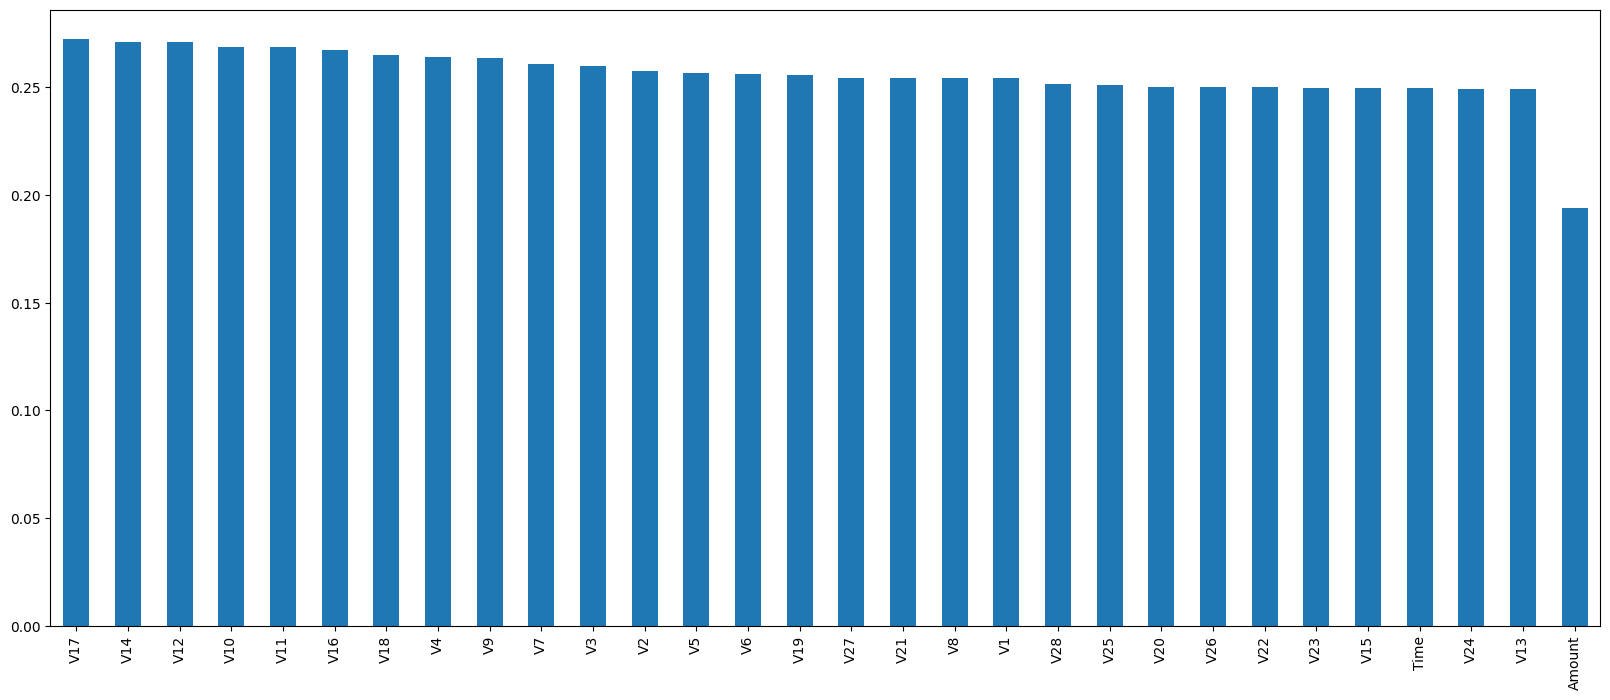

In [7]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_rs = mutual_info_classif(X_train_rs, y_train_rs)
print(m_rs)
print()

m_rs = pd.Series(m_rs)

m_rs.index = X_train_rs.columns
m_rs.sort_values(ascending= False)
m_rs.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [8]:
from sklearn.feature_selection import SelectKBest
k_best = 29
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_rs = mi_selector.fit_transform(X_train_rs, y_train_rs)
X_test_selected_rs = mi_selector.transform(X_test_rs)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv =10)

# fitting the model for grid search
grid.fit(X_train_selected_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     16003
         1.0       0.83      0.88      0.85      1397

    accuracy                           0.98     17400
   macro avg       0.91      0.93      0.92     17400
weighted avg       0.98      0.98      0.98     17400



# Feature Selection for Gaussian NB

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

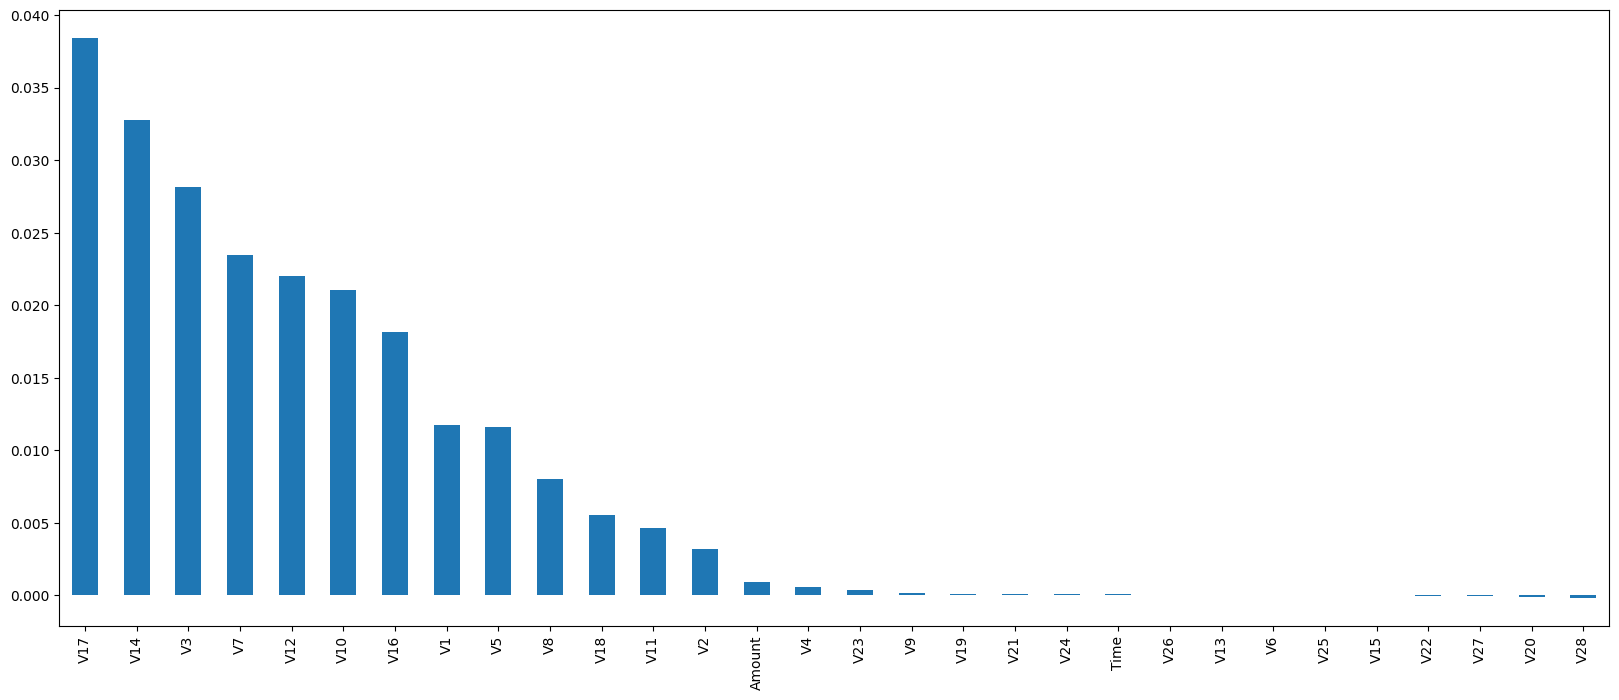

In [10]:
from sklearn.inspection import permutation_importance
g_NB.fit(X_train_rs, y_train_rs)

imps = permutation_importance(g_NB, X_test_rs, y_test_rs)
absolute_importances_rs = np.abs(imps.importances_mean)
absolute_importances_rs = pd.Series(imps.importances_mean, index = X_test_rs.columns)
absolute_importances_rs.sort_values(ascending = False).plot.bar(figsize = (20,8))

#  Selecting KBest for Gaussian NB

In [15]:
k = 13
top_k_features = absolute_importances_rs.nlargest(k).index

print(top_k_features)

X_train_selected_rs_1 = X_train_rs[top_k_features]
X_test_selected_rs_1 = X_test_rs[top_k_features]


Index(['V17', 'V14', 'V3', 'V7', 'V12', 'V10', 'V16', 'V1', 'V5', 'V8', 'V18',
       'V11', 'V2'],
      dtype='object')


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_rs_1, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs_1)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     16003
         1.0       0.83      0.89      0.86      1397

    accuracy                           0.98     17400
   macro avg       0.91      0.94      0.92     17400
weighted avg       0.98      0.98      0.98     17400



# **SMOTETomek** 

In [3]:
from imblearn.combine import SMOTETomek
smto = SMOTETomek()
X_smto, y_smto = smto.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train_smto, X_test_smto, y_train_smto, y_test_smto = train_test_split(X_smto, y_smto, test_size = 0.2, random_state = 40)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11408
         1.0       0.98      0.90      0.94     11341

    accuracy                           0.94     22749
   macro avg       0.94      0.94      0.94     22749
weighted avg       0.94      0.94      0.94     22749



# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.30898321 0.30386481 0.42266702 0.49501118 0.51894836 0.25539451
 0.37196798 0.39982684 0.24182298 0.35585041 0.52711152 0.4971586
 0.5226941  0.05064744 0.5766003  0.05577502 0.41924278 0.48165053
 0.29647033 0.13709334 0.17777323 0.34214911 0.03853673 0.11036791
 0.10331911 0.09476624 0.17208423 0.31442254 0.27494633 0.31112789]



<Axes: >

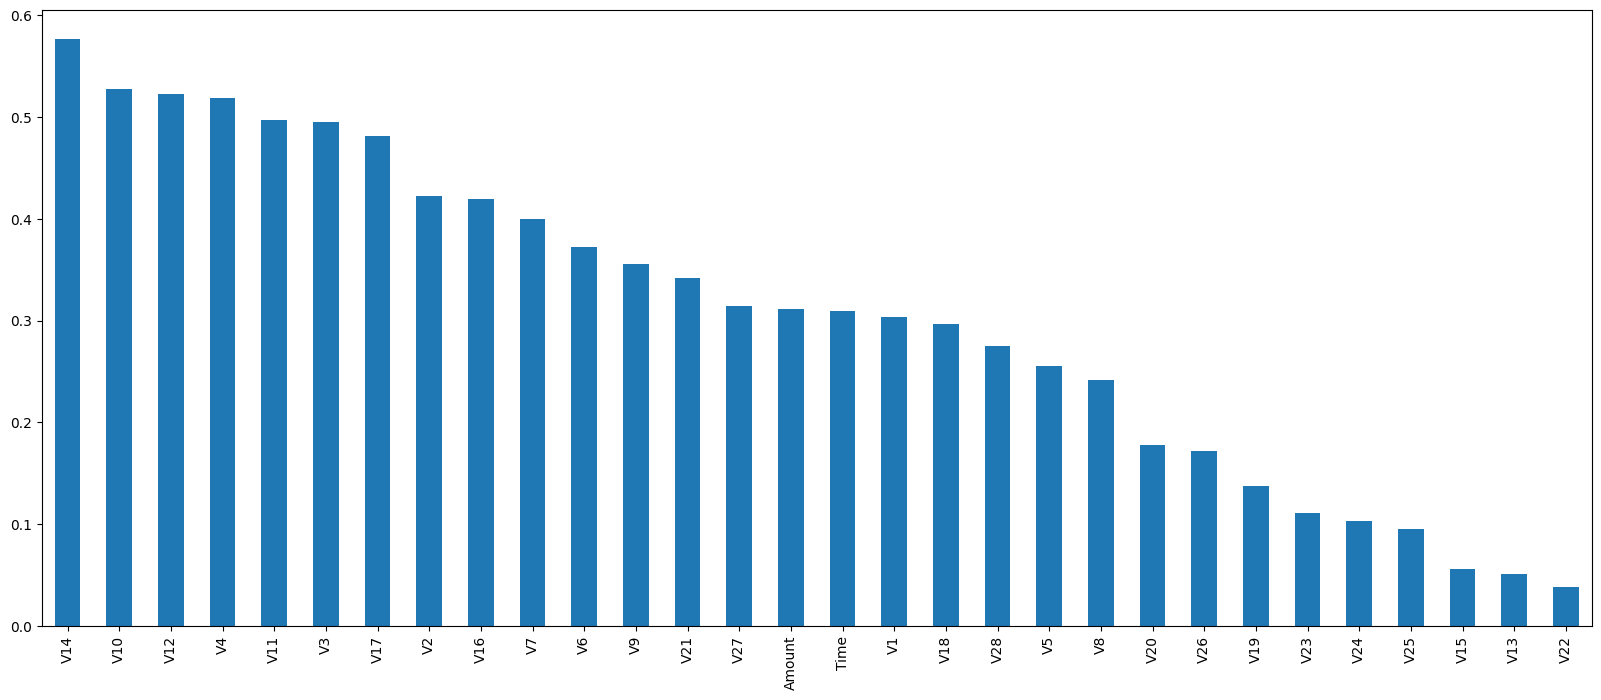

In [24]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smto = mutual_info_classif(X_train_smto, y_train_smto)
print(m_smto)
print()

m_smto = pd.Series(m_smto)

m_smto.index = X_train_smto.columns
m_smto.sort_values(ascending= False)
m_smto.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [26]:
from sklearn.feature_selection import SelectKBest
k_best = 27
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smto = mi_selector.fit_transform(X_train_smto, y_train_smto)
X_test_selected_smto = mi_selector.transform(X_test_smto)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11408
         1.0       0.98      0.90      0.94     11341

    accuracy                           0.94     22749
   macro avg       0.94      0.94      0.94     22749
weighted avg       0.94      0.94      0.94     22749



# Feature Selection for Gaussian NB

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

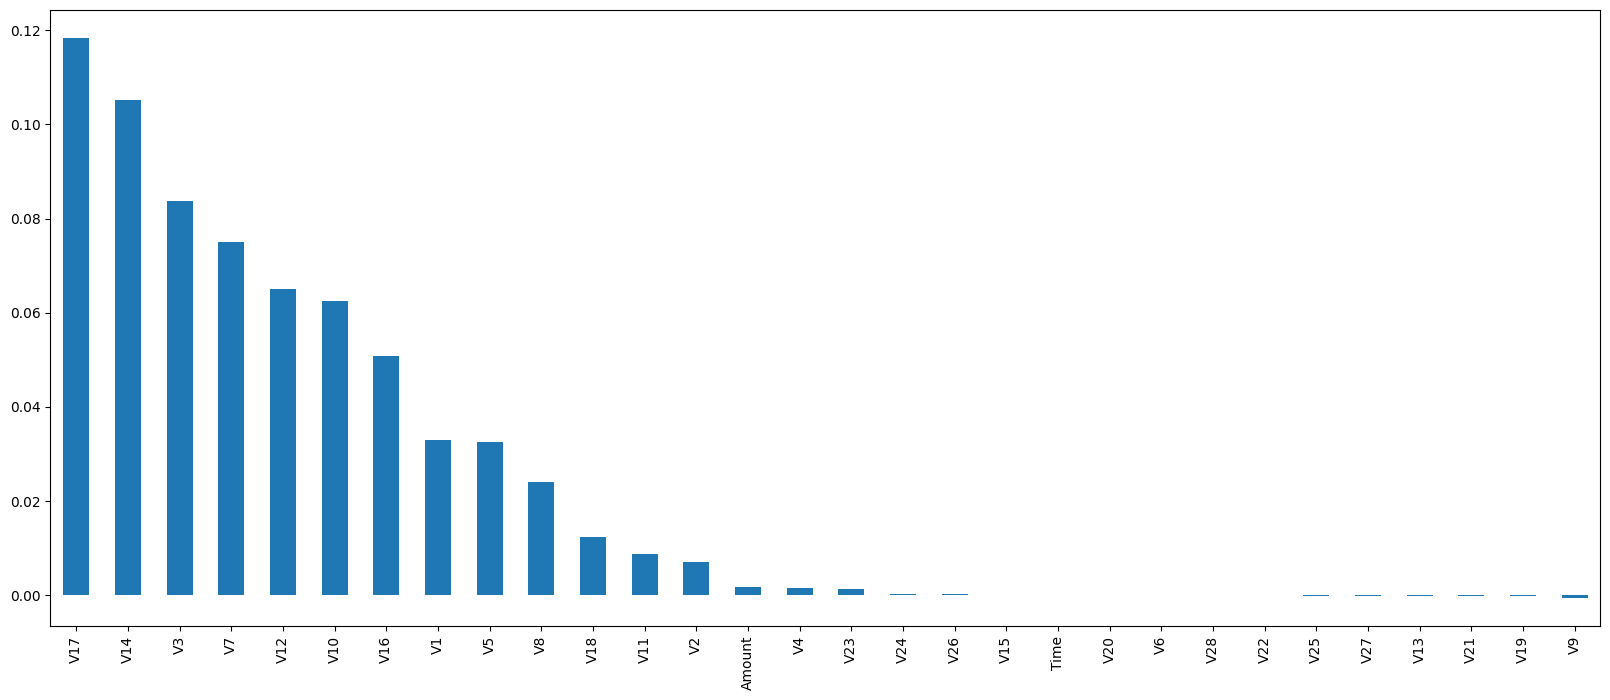

In [4]:
from sklearn.inspection import permutation_importance
g_NB.fit(X_train_smto, y_train_smto)

imps = permutation_importance(g_NB, X_test_smto, y_test_smto)
absolute_importances_smto = np.abs(imps.importances_mean)
absolute_importances_smto = pd.Series(imps.importances_mean, index = X_test_rs.columns)
absolute_importances_smto.sort_values(ascending = False).plot.bar(figsize = (20,8))

# Selecting KBest for Gaussian NB
# **BEST**

In [5]:
k = 13
top_k_features = absolute_importances_smto.nlargest(k).index

print(top_k_features)

X_train_selected_smto_1 = X_train_smto[top_k_features]
X_test_selected_smto_1 = X_test_smto[top_k_features]


Index(['V17', 'V14', 'V3', 'V7', 'V12', 'V10', 'V16', 'V1', 'V5', 'V8', 'V18',
       'V11', 'V2'],
      dtype='object')


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto_1, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto_1)

# print confusion matrix
print(confusion_matrix(y_test_smto, grid_predictions))

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
[[11192   209]
 [ 1124 10216]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     11401
         1.0       0.98      0.90      0.94     11340

    accuracy                           0.94     22741
   macro avg       0.94      0.94      0.94     22741
weighted avg       0.94      0.94      0.94     22741



# **SMOTE + TOMEKLinks**

In [32]:
from imblearn.over_sampling import SMOTE
desired_counts = {0:57000, 1: 5500}
smot = SMOTE(sampling_strategy=desired_counts, random_state=40)
X_smot, y_smot =smot.fit_resample(X, y)

from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_smotu, y_smotu = tomek_links.fit_resample(X_smot, y_smot)

from sklearn.model_selection import train_test_split
X_train_smotu, X_test_smotu, y_train_smotu, y_test_smotu = train_test_split(X_smotu, y_smotu, test_size = 0.3, random_state = 40)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     17016
         1.0       0.88      0.89      0.89      1694

    accuracy                           0.98     18710
   macro avg       0.94      0.94      0.94     18710
weighted avg       0.98      0.98      0.98     18710



# Feature Selection

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.10925001 0.1162004  0.17385205 0.20958557 0.21542547 0.11742366
 0.15946778 0.17571248 0.10819005 0.15998037 0.23189295 0.22323856
 0.2312661  0.01174203 0.25050956 0.01682305 0.18982667 0.21999999
 0.14422164 0.05784564 0.06582582 0.13830833 0.01280036 0.04148292
 0.03125758 0.04240343 0.05447078 0.12760939 0.10399311 0.09087175]



<Axes: >

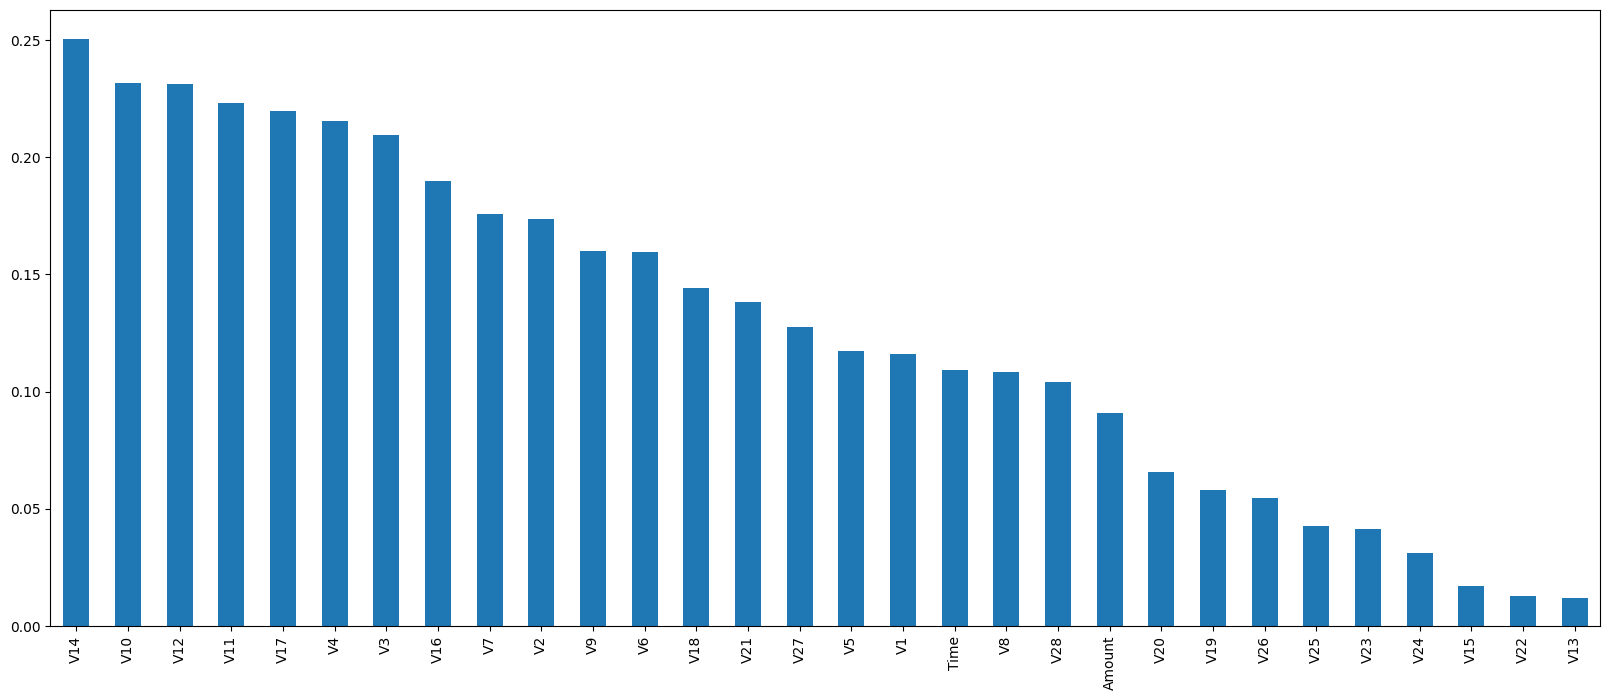

In [34]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smotu = mutual_info_classif(X_train_smotu, y_train_smotu)
print(m_smotu)
print()

m_smotu = pd.Series(m_smotu)

m_smotu.index = X_train_smotu.columns
m_smotu.sort_values(ascending= False)
m_smotu.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting Kbest

In [35]:
from sklearn.feature_selection import SelectKBest
k_best = 26
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smotu = mi_selector.fit_transform(X_train_smotu, y_train_smotu)
X_test_selected_smotu = mi_selector.transform(X_test_smotu)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     17016
         1.0       0.88      0.89      0.89      1694

    accuracy                           0.98     18710
   macro avg       0.94      0.94      0.94     18710
weighted avg       0.98      0.98      0.98     18710



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Feature Selection for Gaussian NB

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

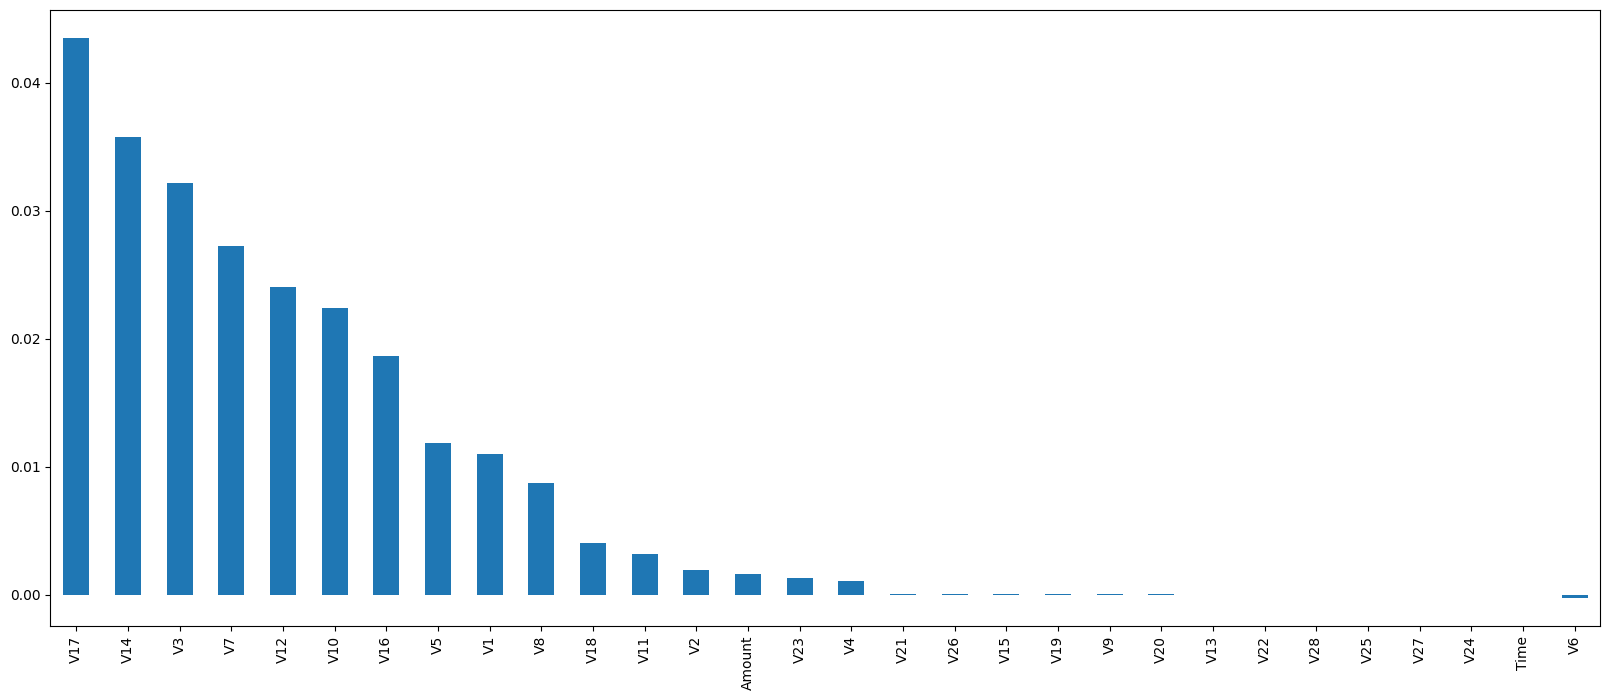

In [39]:
from sklearn.inspection import permutation_importance
g_NB.fit(X_train_smotu, y_train_smotu)

imps = permutation_importance(g_NB, X_test_smotu, y_test_smotu)
absolute_importances_smotu = np.abs(imps.importances_mean)
absolute_importances_smotu = pd.Series(imps.importances_mean, index = X_test_rs.columns)
absolute_importances_smotu.sort_values(ascending = False).plot.bar(figsize = (20,8))

# Selecting KBest for Gaussian NB

In [51]:
k = 16
top_k_features = absolute_importances_smto.nlargest(k).index

print(top_k_features)

X_train_selected_smotu_1 = X_train_smotu[top_k_features]
X_test_selected_smotu_1 = X_test_smotu[top_k_features]


Index(['V17', 'V14', 'V3', 'V7', 'V12', 'V10', 'V16', 'V5', 'V1', 'V8', 'V18',
       'V11', 'V2', 'Amount', 'V4', 'V23'],
      dtype='object')


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(g_NB, g_NB_parameters, scoring='f1_macro', cv =10)

# fitting the model for grid search
grid.fit(X_train_selected_smotu_1, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu_1)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{}
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     17016
         1.0       0.87      0.90      0.88      1694

    accuracy                           0.98     18710
   macro avg       0.93      0.94      0.94     18710
weighted avg       0.98      0.98      0.98     18710

